## Neural Network to Read Handwriting Digits
**By: `Suraj Honkamble`**
### Advanced Level Task-1

### Import required libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Plot Images

11490434/11490434 [==============================] - 0s 0us/step


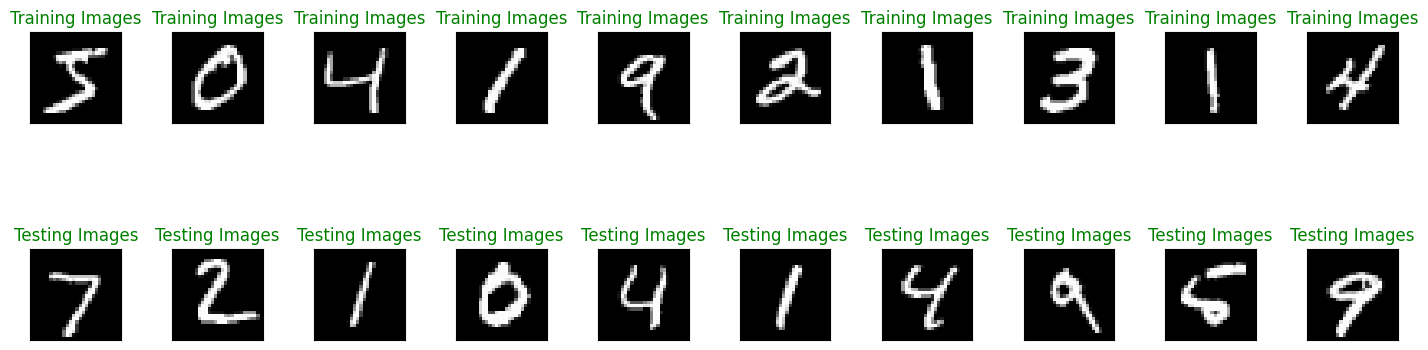

In [2]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
plt.figure(figsize=(18,4))
for i in range(10):
    ax=plt.subplot(3,10, i+1)
    plt.imshow(x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Training Images", color='green')

    ax=plt.subplot(3,10, i+1+2*10)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Testing Images", color='green')

### Unique Digits

In [3]:
print("Train Labels", set(y_train))
print("Test Labels", set(y_test))

Train Labels {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Test Labels {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


### Load MNIST Train dataset

Dataset link: https://drive.google.com/drive/folders/1ZK4Bv19vtv8YAZlaI5YZKY2xxE7OyU_w?usp=sharing

In [4]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Datasets/mnist/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape

(42000, 785)

### Create Input and output features

In [6]:
X=train.drop('label', axis=1).values
y=train['label'].values
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (42000, 784)
y shape: (42000,)


### Image Preproccesing

In [7]:
X=X/255.0
X=X.reshape(-1,28,28,1)
X.shape

(42000, 28, 28, 1)

### Encoding Output labels

In [8]:
from keras.utils.np_utils import to_categorical
y = to_categorical(y) #OneHotEncoding
print("y shape:", y.shape)
print(y[0])

y shape: (42000, 10)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
print("X train shape", x_train.shape)
print("X test shape", x_test.shape)
print("y train shape", y_train.shape)
print("y test shape", y_test.shape)

X train shape (37800, 28, 28, 1)
X test shape (4200, 28, 28, 1)
y train shape (37800, 10)
y test shape (4200, 10)


### Data Generator/Augmentation

In [10]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(
        rotation_range=15,
        zoom_range = 0.01,
        width_shift_range=0.1,
        height_shift_range=0.1)


#Create train and test augmentation
train_gen=datagen.flow(x_train, y_train, batch_size=32)
test_gen=datagen.flow(x_test, y_test, batch_size=32)

### Building CNN model

In [12]:
import keras
from keras.models import Sequential
from keras. layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Flatten

In [13]:
model=Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

In [17]:
hist=model.fit(train_gen, epochs=100, batch_size=32, validation_data=test_gen)

Epoch 1/100
1182/1182 [==============================] - 20s 17ms/step - loss: 0.0339 - accuracy: 0.9899 - val_loss: 0.0375 - val_accuracy: 0.9895
Epoch 2/100
1182/1182 [==============================] - 21s 18ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0408 - val_accuracy: 0.9876
Epoch 3/100
1182/1182 [==============================] - 20s 17ms/step - loss: 0.0295 - accuracy: 0.9915 - val_loss: 0.0261 - val_accuracy: 0.9924
Epoch 4/100
1182/1182 [==============================] - 23s 19ms/step - loss: 0.0287 - accuracy: 0.9921 - val_loss: 0.0261 - val_accuracy: 0.9917
Epoch 5/100
1182/1182 [==============================] - 20s 17ms/step - loss: 0.0276 - accuracy: 0.9920 - val_loss: 0.0385 - val_accuracy: 0.9890
Epoch 6/100
1182/1182 [==============================] - 23s 19ms/step - loss: 0.0264 - accuracy: 0.9915 - val_loss: 0.0268 - val_accuracy: 0.9919
Epoch 7/100
1182/1182 [==============================] - 23s 19ms/step - loss: 0.0231 - accuracy: 0.9929 - val_loss: 0

### Plot training and testing loss and accuracy

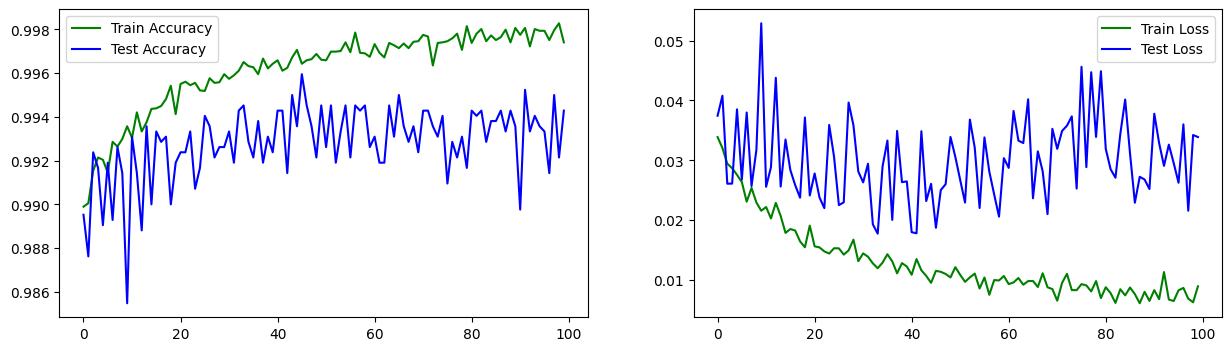

In [19]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(hist.history['accuracy'], color='green', label="Train Accuracy")
plt.plot(hist.history['val_accuracy'], color='blue',label="Test Accuracy")
plt.legend()

plt.subplot(122)
plt.plot(hist.history['loss'], color='green', label="Train Loss")
plt.plot(hist.history['val_loss'], color='blue',label="Test Loss")
plt.legend()

### Prediction

In [20]:
y_pred = model.predict(x_test)
y_pred[:5]

132/132 [==============================] - 0s 2ms/step


array([[8.4693221e-25, 1.2427901e-20, 1.2117774e-13, 1.0000000e+00,
        2.8754430e-28, 2.0850151e-14, 1.4561585e-21, 4.3337095e-21,
        3.4487689e-24, 2.9652092e-24],
       [2.3828209e-32, 8.6240080e-35, 1.6996152e-25, 2.4395935e-28,
        1.0872823e-26, 1.1722763e-29, 1.0000000e+00, 0.0000000e+00,
        1.1970868e-20, 1.2688644e-35],
       [1.9740977e-14, 4.8263779e-16, 3.1820195e-12, 1.4708179e-11,
        2.9649790e-08, 2.3836964e-15, 5.1555888e-19, 4.2810550e-10,
        1.3550403e-11, 1.0000000e+00],
       [3.0428669e-16, 1.6631291e-16, 1.2282593e-13, 4.3402814e-08,
        3.4592280e-14, 1.0000000e+00, 1.7707727e-13, 6.1810669e-12,
        7.4291830e-17, 1.7060696e-09],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.4662816e-33, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        9.4042515e-29, 0.0000000e+00]], dtype=float32)

#### Prediction are the probabilies hence select the highest probability class

In [21]:
Y_pred = np.argmax(y_pred, 1)
Y_test = np.argmax(y_test, 1)
print(Y_pred)
print(Y_test)

[3 6 9 ... 9 3 7]
[3 6 9 ... 9 3 7]


### Model evaluation

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(Y_test, Y_pred)*100

99.42857142857143

**Prediction Accuracy 99.42% which is very good.**

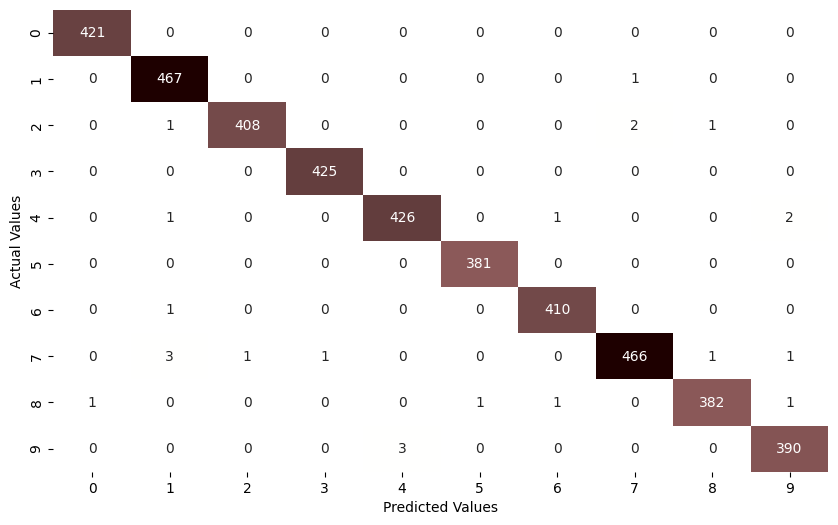

In [29]:

matrix_values=confusion_matrix(Y_test, Y_pred) # Confusion matrix

import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(matrix_values.T, annot=True, fmt='.0f', cbar=False, cmap='pink_r')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

### Load MNIST Test dataset for Prediction on Test

In [50]:
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Datasets/mnist/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
test.shape

(28000, 784)

### Preprocess the test data for prediction

In [52]:
test=test.values
test=test/255.0
test=test.reshape(-1,28,28,1)

In [53]:
prediction=model.predict(test)
Prediction=np.argmax(prediction, 1)
Prediction

875/875 [==============================] - 2s 2ms/step


array([2, 0, 9, ..., 3, 9, 2])

### Check whether the predictions are correct or not

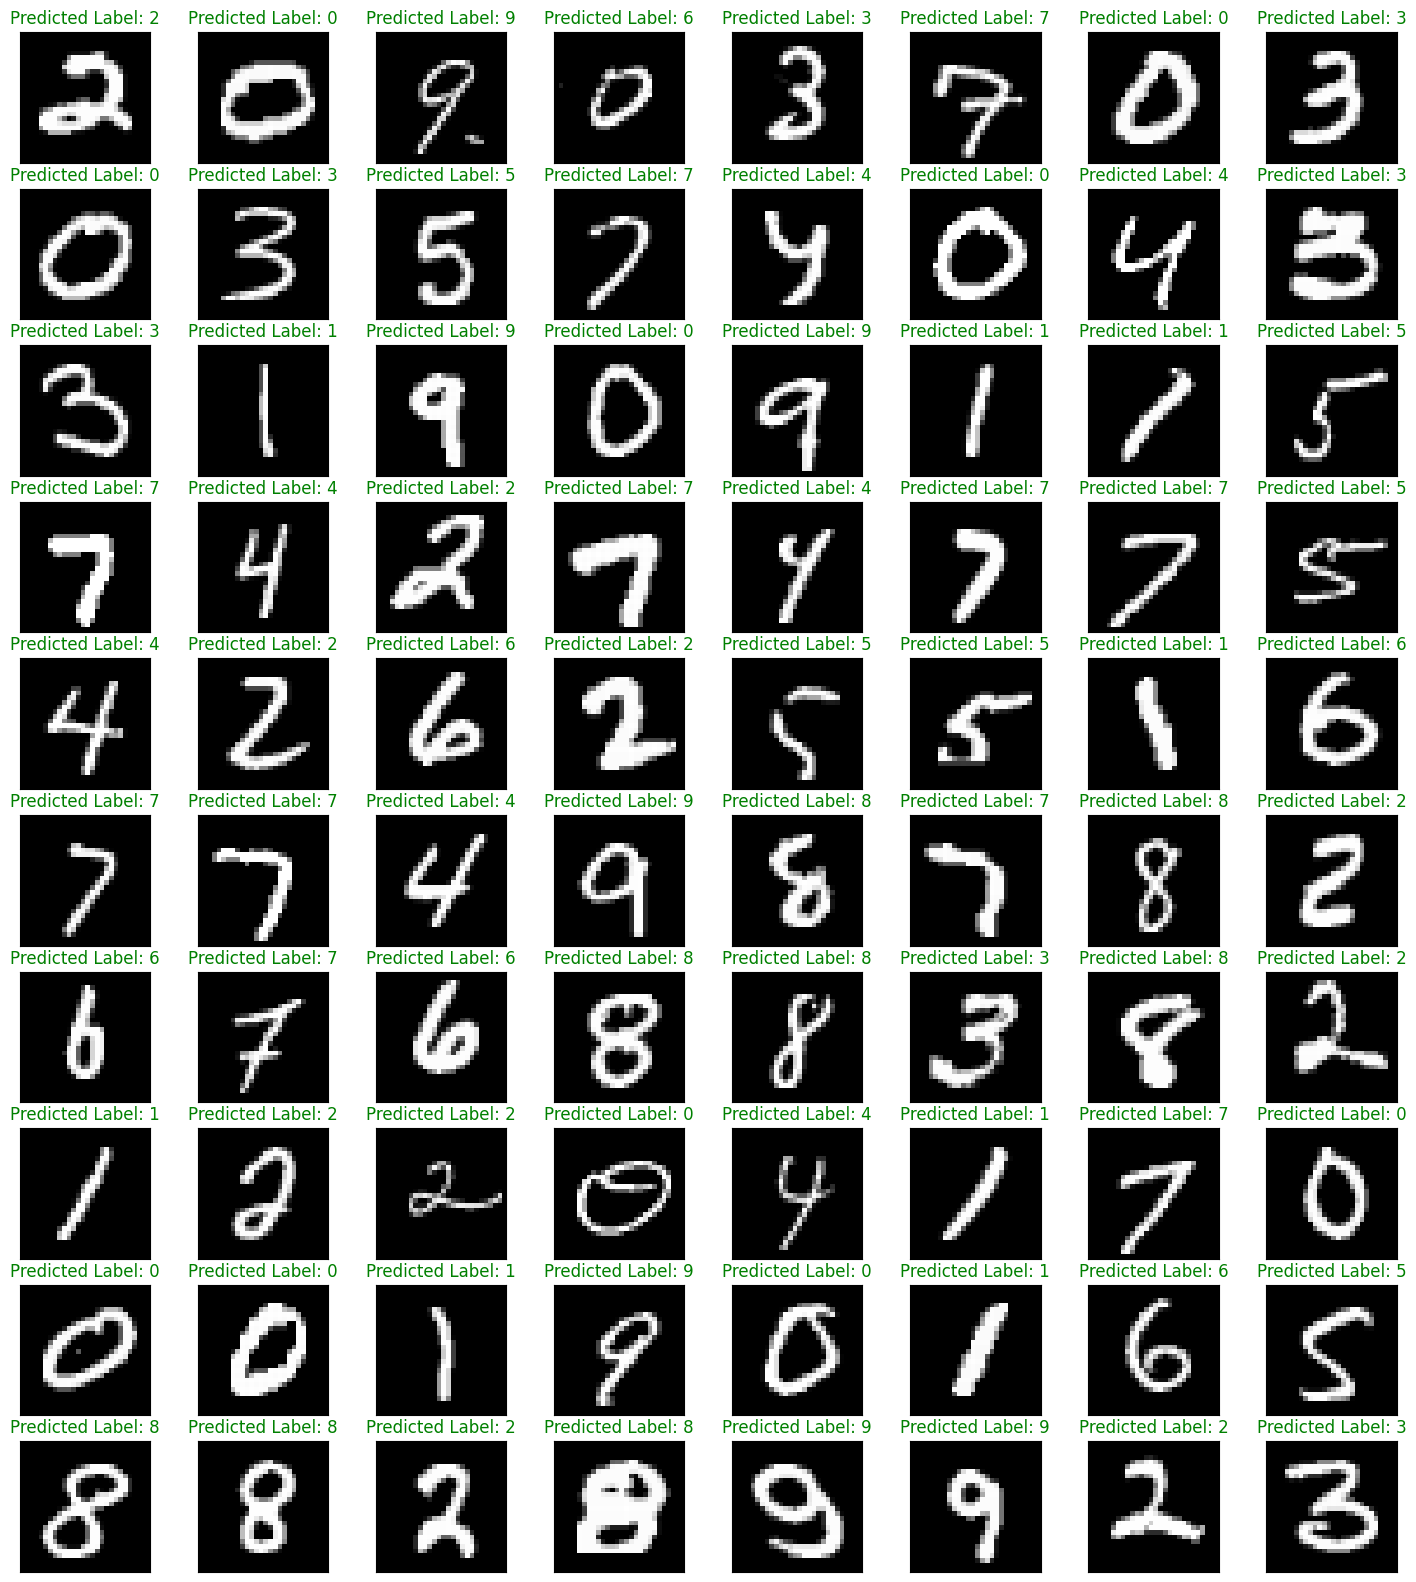

In [61]:
plt.figure(figsize=(18,20))
for i in range(80):
    ax=plt.subplot(10,8, i+1)
    plt.imshow(test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f"Predicted Label: {Prediction[i]}", color='green')

### Conclusion:
- Using MNIST Digits data created CNN model to predict the label for handwritten digit.
- Prediction accuracy is about 99.42%.